## Correlation Analysis

In [119]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
# Load the dataset from the given URL
file_url = "./data/survey_data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Analyze and Visualize Compensation Distribution</h3>


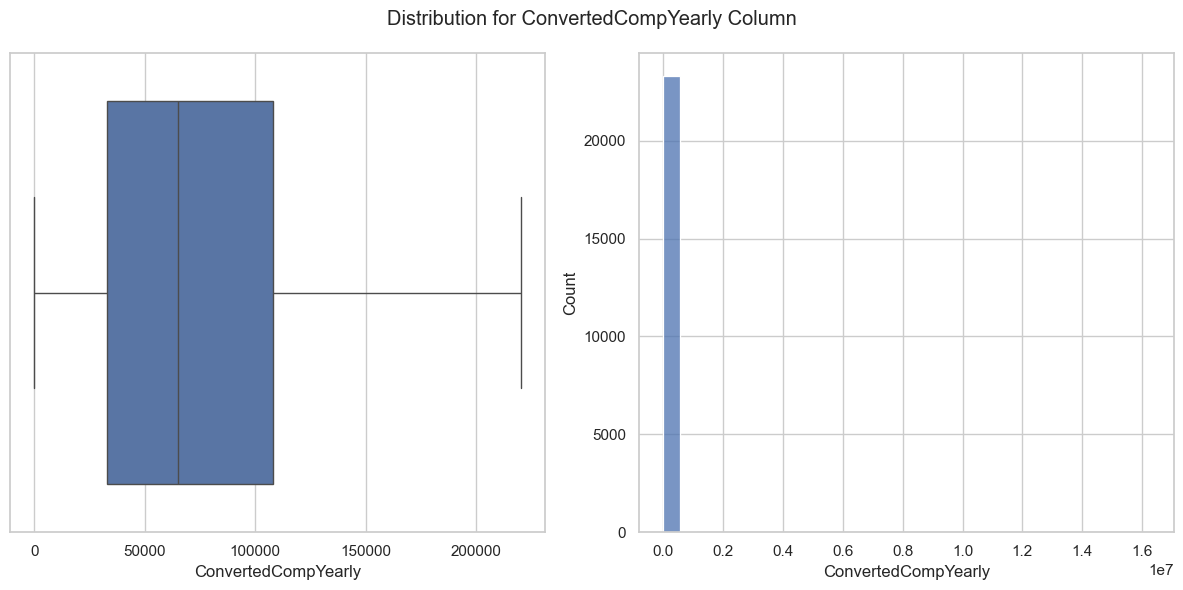

In [121]:
fig, (box, hist) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(ax=box, data=df, x='ConvertedCompYearly', showfliers=False)
sns.histplot(ax=hist, data=df, x='ConvertedCompYearly', bins=30)

plt.suptitle('Distribution for ConvertedCompYearly Column')
plt.tight_layout()
plt.show()


<h3>Calculate Median Compensation for Full-Time Employees</h3>


In [13]:
print('Median Yearly Compensation for Full time employees:', df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].median(), 'USD')

Median Yearly Compensation for Full time employees: 69814.0 USD


<h3>Analyzing Compensation Range and Distribution by Country</h3>


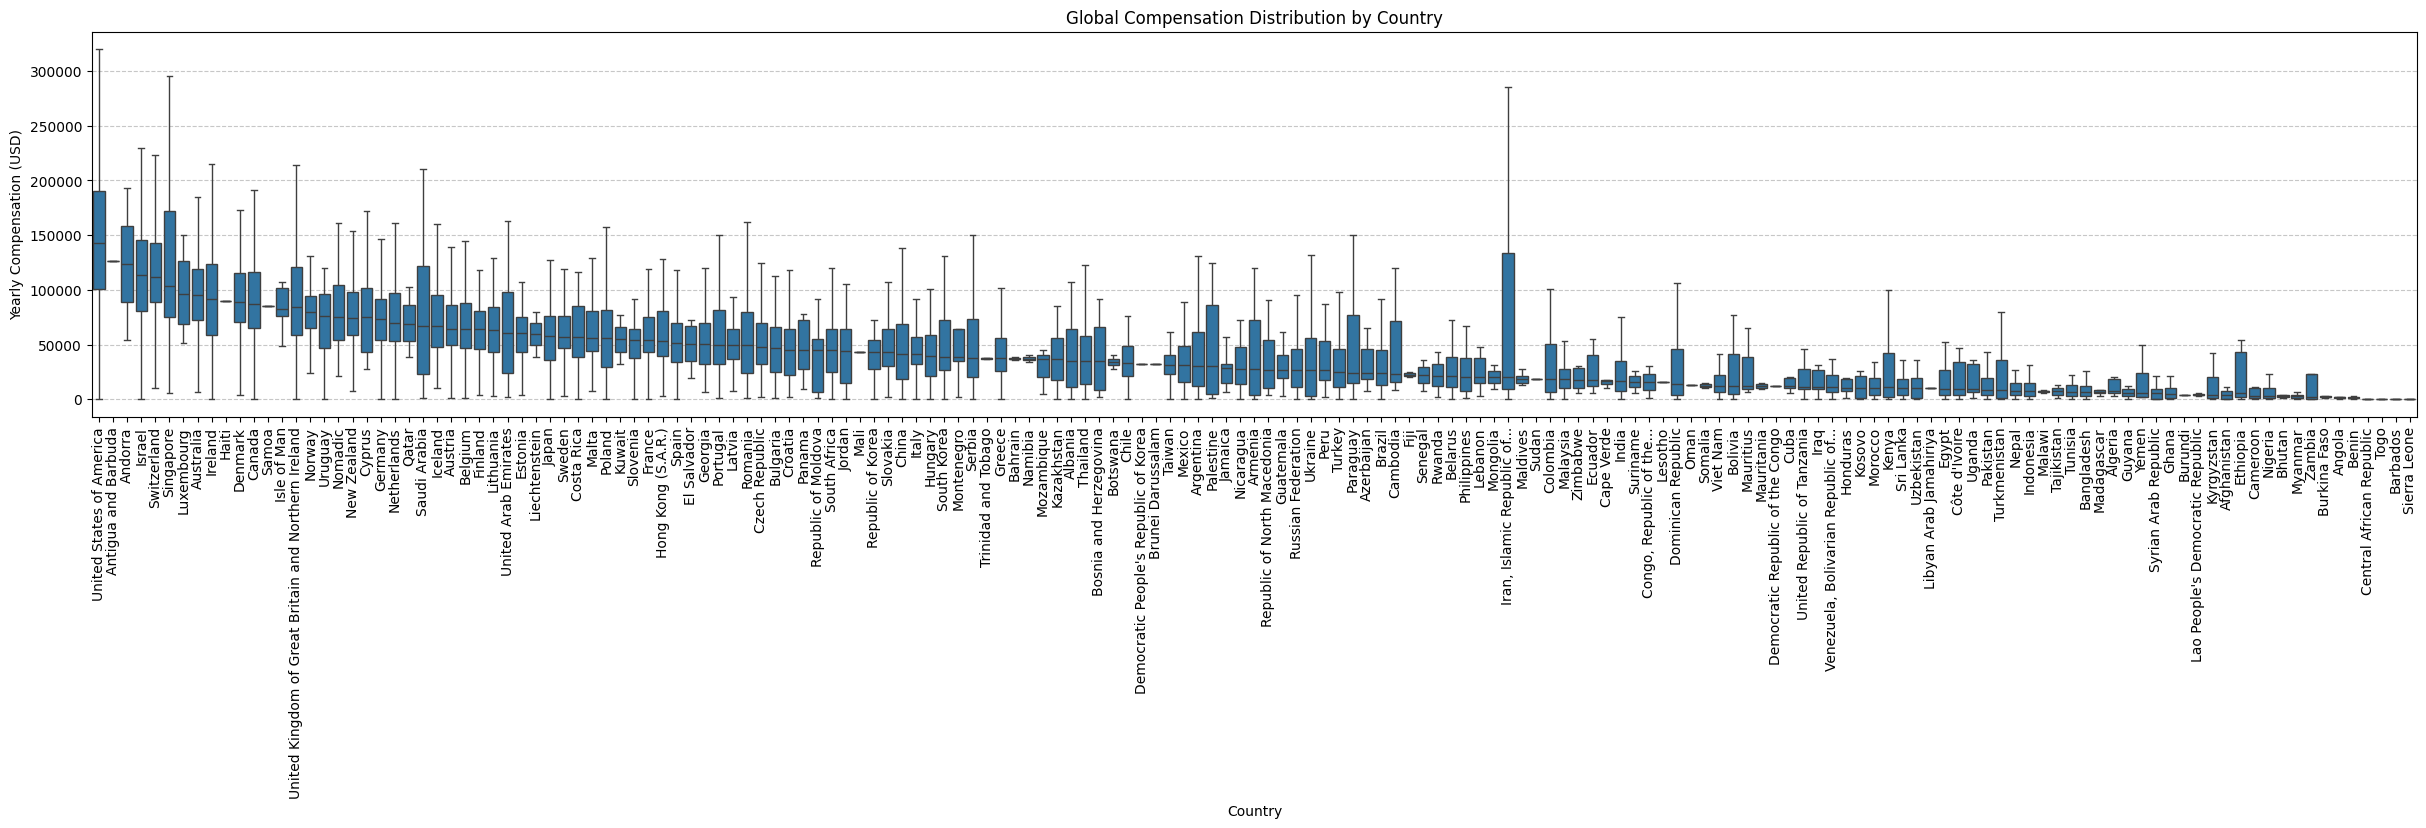

In [73]:
# # Remove extreme outliers
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
filtered_df = df[df['ConvertedCompYearly'] <= upper_limit]

# Sort countries by median salary
median_salaries = filtered_df.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)
sorted_countries = median_salaries.index.tolist()

# Plot box plots
plt.figure(figsize=(30, 5))
sns.boxplot(
    data=df, 
    x='Country', 
    y='ConvertedCompYearly', 
    order=sorted_countries, 
    showfliers=False  # Hide extreme outliers
)

plt.xticks(rotation=90)  # Rotate country names for better visibility
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Global Compensation Distribution by Country')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h3>Removing Outliers from the Dataset</h3>


In [75]:
# Using IQR to remove outliers
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

<Axes: >

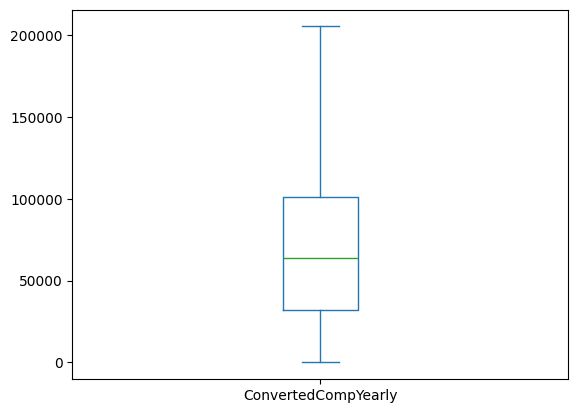

In [86]:
df_no_outliers['ConvertedCompYearly'].plot(kind='box', showfliers=False)

<h3>Finding Correlations Between Key Variables</h3>


<Axes: >

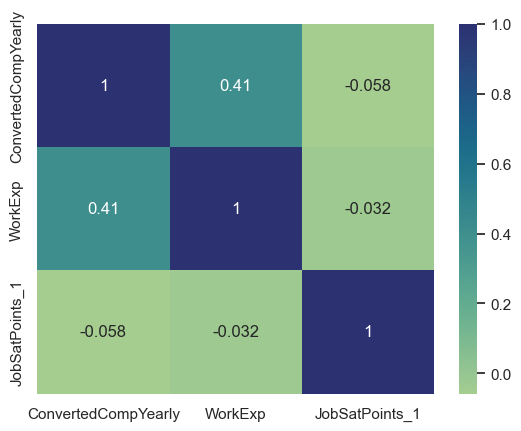

In [124]:
corr = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1',]].corr()

sns.heatmap(corr, annot=True, cmap='crest')

<h3>Scatter Plot for Correlations</h3>


Text(0, 0.5, '')

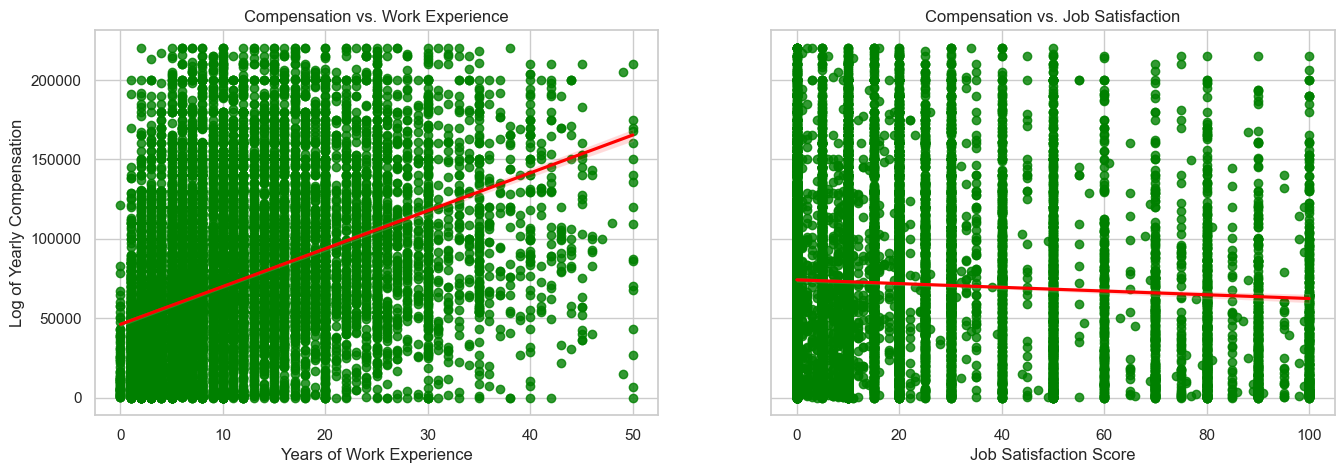

In [118]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Scatter plot: ConvertedCompYearly vs. WorkExp
sns.regplot(
    ax=axes[0], 
    x=df_no_outliers['WorkExp'], 
    y=df_no_outliers['ConvertedCompYearly'], 
    line_kws={'color': 'red'},
    color='green'
)

axes[0].set_title('Compensation vs. Work Experience')
axes[0].set_xlabel('Years of Work Experience')
axes[0].set_ylabel('Log of Yearly Compensation')

# Scatter plot: ConvertedCompYearly vs. JobSatPoints_1
sns.regplot(
    ax=axes[1], 
    x=df_no_outliers['JobSatPoints_1'], 
    y=df_no_outliers['ConvertedCompYearly'], 
    line_kws={'color': 'red'},
    color='green'
)
axes[1].set_title('Compensation vs. Job Satisfaction')
axes[1].set_xlabel('Job Satisfaction Score')
axes[1].set_ylabel('')